# Sound bite classifier
[How to apply machine- and deep learning methods to audio analysis](https://towardsdatascience.com/how-to-apply-machine-learning-and-deep-learning-methods-to-audio-analysis-615e286fcbbc). 

Article by: Niko Laskaris

In [10]:
import json
from comet_ml import Experiment

import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
from librosa import display
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
with open('config.json') as f:
    config = json.load(f)
    comet_config = config['comet']

In [3]:
# Initialize Comet experiment
experiment = Experiment(api_key=comet_config['apiKey'], workspace=comet_config['workSpace'], project_name=comet_config["projectName"])

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kpapijnenburg/urban-sound-classifier/007eeb9f5be642f8bad708e41bd02ae9



In [4]:
# Load meta dataset
df = pd.read_csv('UrbanSound8k/metadata/UrbanSound8k.csv')
df.head()

# Extract all unique labels
labels = list(df['class'].unique())

In [5]:
# Load example audio file for each label
files = dict()
base = 'UrbanSound8k/audio/fold'

for i in range(len(labels)):
    temp = df[df['class'] == labels[i]][:1].reset_index()
    path = f'{base}{temp.fold[0]}/{temp.slice_file_name[0]}'
    files[labels[i]] = path

{'web': 'https://www.comet.ml/api/image/download?imageId=3d32fcf4dca9479b9988167dc92fd5f9&experimentKey=007eeb9f5be642f8bad708e41bd02ae9',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=3d32fcf4dca9479b9988167dc92fd5f9&experimentKey=007eeb9f5be642f8bad708e41bd02ae9',
 'imageId': '3d32fcf4dca9479b9988167dc92fd5f9'}

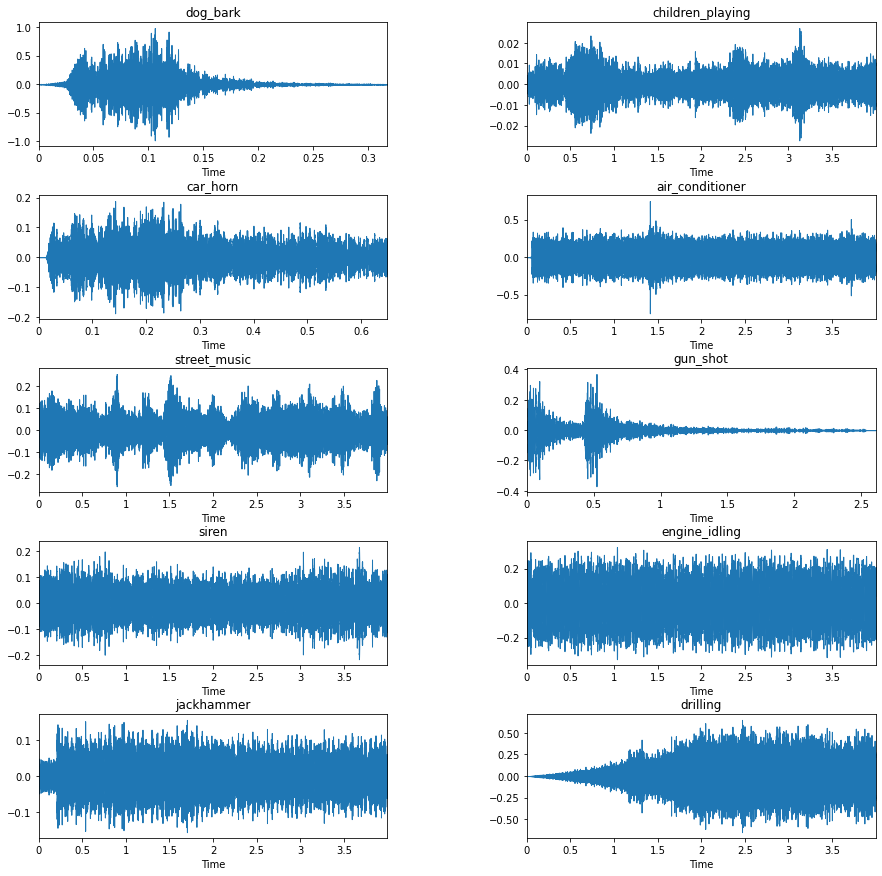

In [12]:
# Visualize waveforms using Librosa & pyplot
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, label in enumerate(labels):
    fname = files[label]
    fig.add_subplot(5, 2, i+1)
    plt.title(label)
    data, sample_rate = librosa.load(fname)
    display.waveplot(data, sr=sample_rate)

plt.savefig('class_example.png')

# Log the waveform to the Comet experiment
experiment.log_image('class_example.png')